In [1]:
import os 
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import zip_longest
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import utils_plots as ut

In [38]:
# Set directories
project_dir = '/Users/huripari/Documents/PhD/TCs_Genesis'
fs_dir = os.path.join(project_dir, 'FS_TCG')
results_dir = os.path.join(fs_dir, 'results')
# Set basin name and correspondent number of clusters
BASIN = 'NEP'
N_CLUSTERS = 9
# Set metrics name
month_metrics = ['MSE', 'R', 'R2']
years_metrics = ['MSE_Y', 'R_Y', 'R2_Y']

In [39]:
# Get the values to plot from the metrics file
track_file = os.path.join(results_dir, f'sim_performance_extra_{BASIN}_noTS.csv')
track_df = pd.read_csv(track_file, index_col=0)
track_df = track_df[track_df['model'] == 'linreg']
track_df = track_df[track_df['n_clusters'] == N_CLUSTERS]

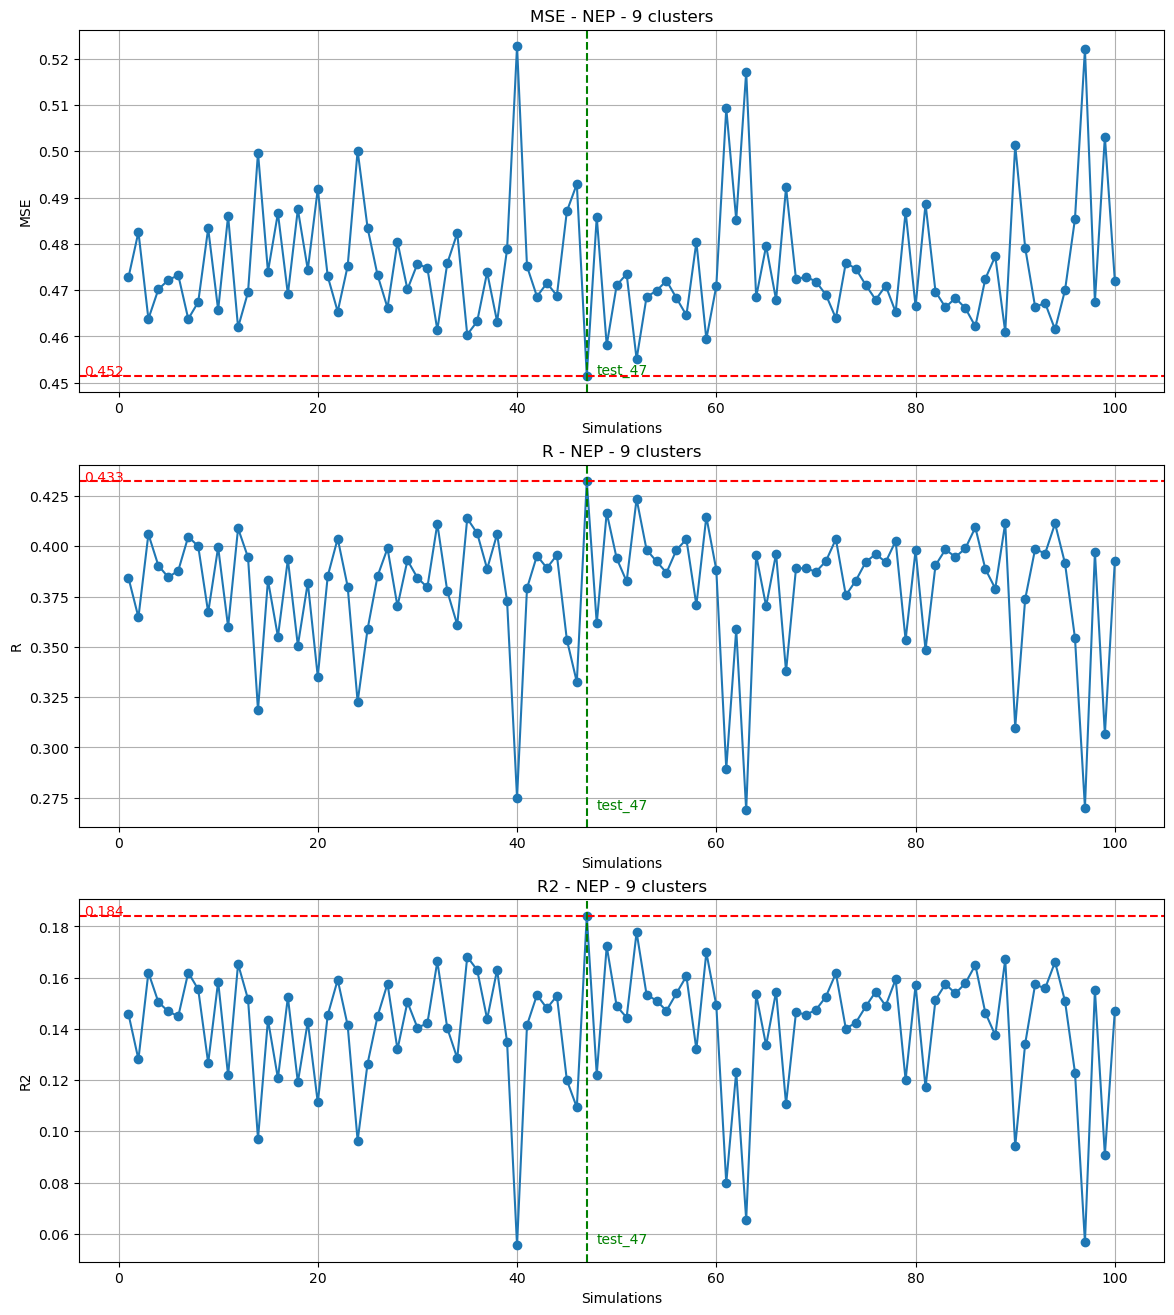

In [43]:
# Creat a figure with 3 row and 1 columns to plot the metrics behavior according to simulations
fig = plt.figure(figsize=(14, 16))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])
for m, metric in enumerate(month_metrics):
    ax = fig.add_subplot(gs[m])
    # Plot the metric values
    column = f'{metric}_mlp'
    metric_vals = track_df[column].values
    ax.plot(np.arange(1, len(metric_vals) + 1), metric_vals, marker='o', label=metric)
    # Add an horizontal line and a vertical line at the coordinates of the best simulation
    if metric == 'MSE':
        best_sim = metric_vals.argmin() + 1
        best_val = metric_vals.min()
    else:
        best_sim = metric_vals.argmax() + 1
        best_val = metric_vals.max()
    ax.axhline(y=best_val, color='r', linestyle='--')
    ax.axvline(x=best_sim, color='g', linestyle='--')
    # Write metric values on the plot
    x_pos = ax.get_xlim()[0] + 0.5
    y_pos = ax.get_ylim()[0] + 0.05*(ax.get_ylim()[1] - ax.get_ylim()[0])
    ax.text(x_pos, best_val, f'{best_val:.3f}', color='r', fontsize=10)
    ax.text(best_sim+1, y_pos, f'test_{best_sim}', color='g', fontsize=10)
    # Set a grid
    ax.grid(True)
    # Set the title and labels
    ax.set_title(f'{metric} - {BASIN} - {N_CLUSTERS} clusters')
    ax.set_xlabel('Simulations')
    ax.set_ylabel(metric)

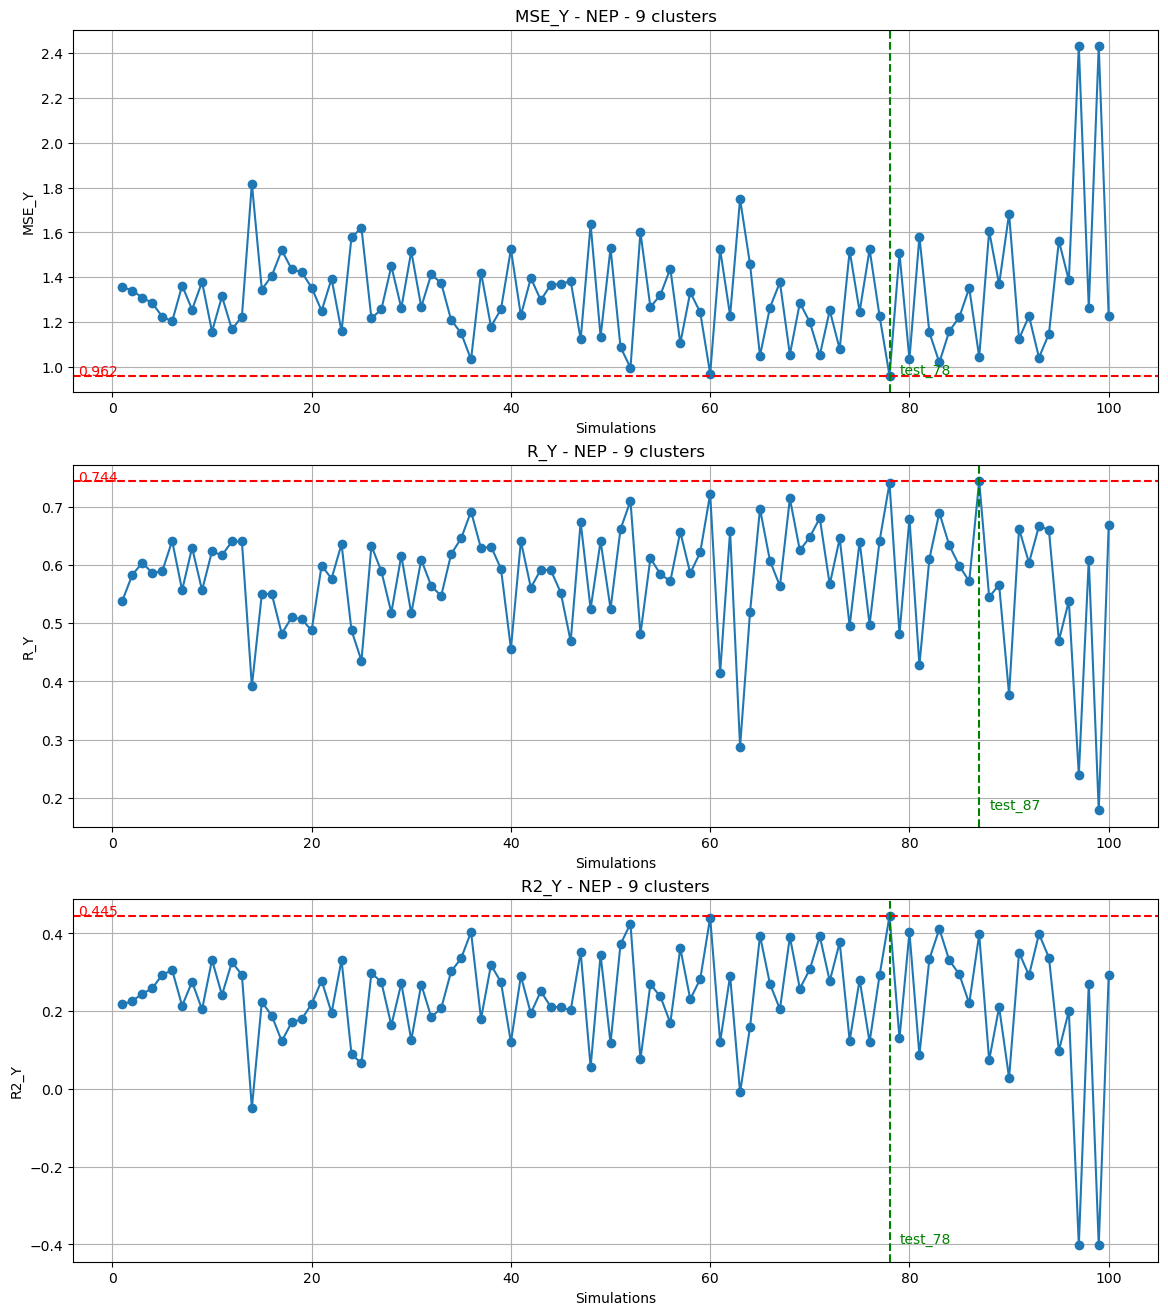

In [44]:
# Creat a figure with 3 row and 1 columns to plot the metrics behavior according to simulations
fig = plt.figure(figsize=(14, 16))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])
for m, metric in enumerate(years_metrics):
    ax = fig.add_subplot(gs[m])
    # Plot the metric values
    column = f'{metric}_mlp'
    metric_vals = track_df[column].values
    ax.plot(np.arange(1, len(metric_vals) + 1), metric_vals, marker='o', label=metric)
    # Add an horizontal line and a vertical line at the coordinates of the best simulation
    if metric == 'MSE_Y':
        best_sim = metric_vals.argmin() + 1
        best_val = metric_vals.min()
    else:
        best_sim = metric_vals.argmax() + 1
        best_val = metric_vals.max()
    ax.axhline(y=best_val, color='r', linestyle='--')
    ax.axvline(x=best_sim, color='g', linestyle='--')
    # Write metric values on the plot
    x_pos = ax.get_xlim()[0] + 0.5
    y_pos = ax.get_ylim()[0] + 0.05*(ax.get_ylim()[1] - ax.get_ylim()[0])
    ax.text(x_pos, best_val, f'{best_val:.3f}', color='r', fontsize=10)
    ax.text(best_sim+1, y_pos, f'test_{best_sim}', color='g', fontsize=10)
    # Set a grid
    ax.grid(True)
    # Set the title and labels
    ax.set_title(f'{metric} - {BASIN} - {N_CLUSTERS} clusters')
    ax.set_xlabel('Simulations')
    ax.set_ylabel(metric)